In [59]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange, quantile
from numpy.random import randint, permutation

plt.rcParams['font.size'] = 14

# Scalar Quantiles via Optimal Transport

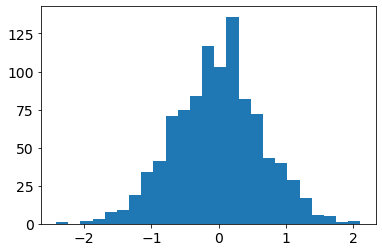

In [60]:
from experiments.data.mvn import IndependentDataProvider

d = 1
k = 1
T = 50
N = 1000

_, Y = IndependentDataProvider(d=d, k=k).sample(n=N)

plt.hist(Y, 25);

In [61]:
from vqr import VectorQuantileEstimator
from vqr.plot import plot_quantiles,plot_quantiles_3d

In [62]:
vq1 = VectorQuantileEstimator(n_levels=T, solver_opts={'verbose': True})
vq1.fit(Y)

  0%|                                                                  | 0/1000 [00:00<?, ?epochs/s]

VectorQuantileEstimator(solver=RegularizedDualVQRSolver(eps=1e-03),
                        solver_opts={'verbose': True})

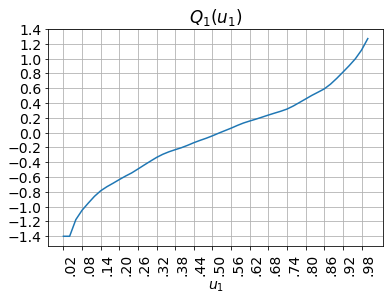

In [63]:
fig = plot_quantiles(
    T, d, Qs=vq1.vector_quantiles(refine=True), Us=vq1.quantile_grid
)
fig.savefig("figs/qr_1d.png", dpi=150, bbox_inches="tight")

# 2D Vector Quantiles

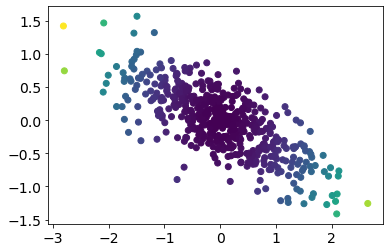

In [64]:
from experiments.data.mvn import IndependentDataProvider

d = 2
k = 1
T = 25
N = 500

_, Y = IndependentDataProvider(d=d, k=k).sample(n=N)
plt.scatter(Y[:, 0], Y[:, 1], c=np.sum(Y**2, axis=1))

In [65]:
vq2 = VectorQuantileEstimator(n_levels=T, solver_opts={'verbose': True})
vq2.fit(Y)

  0%|                                                                  | 0/1000 [00:00<?, ?epochs/s]

VectorQuantileEstimator(n_levels=25, solver=RegularizedDualVQRSolver(eps=1e-03),
                        solver_opts={'verbose': True})

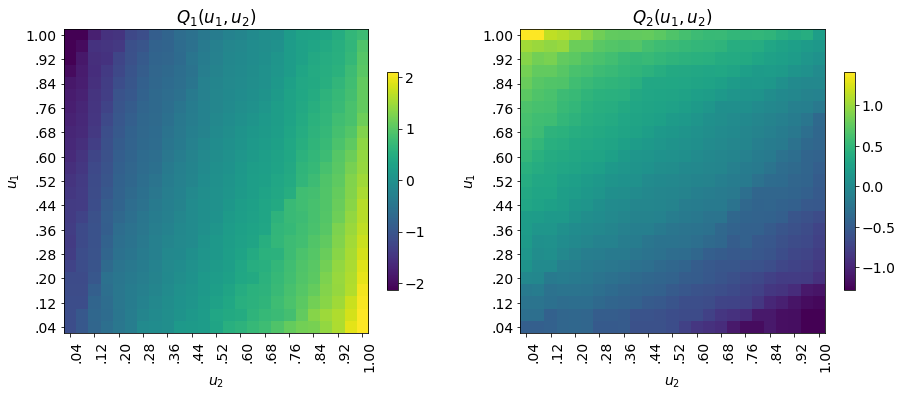

In [66]:
Qs = vq2.vector_quantiles(refine=True)
Us = vq2.quantile_grid

fig = plot_quantiles(T, d, Qs=Qs, Us=Us, figsize=(15, 20))

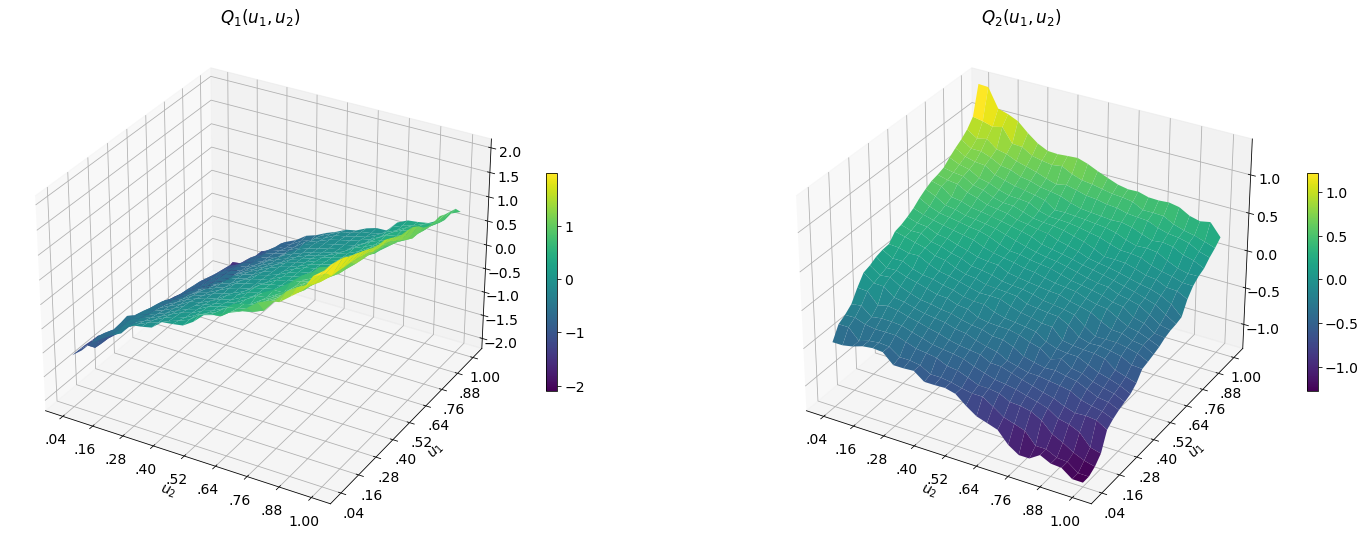

In [67]:
plot_quantiles_3d(T, d, Qs=Qs, Us=Us, figsize=(25, 20))
fig.savefig("figs/qr_2d.png", dpi=150, bbox_inches="tight")

# 3D Vector Quantiles

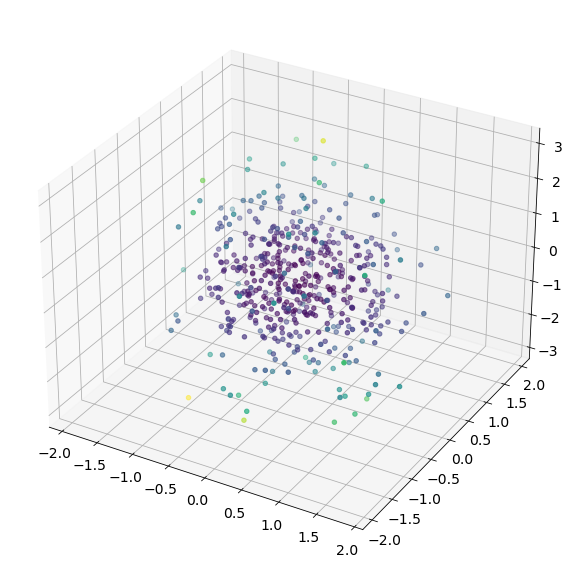

In [68]:
from experiments.data.mvn import IndependentDataProvider

d = 3
k = 1
T = 10
N = 500

_, Y = IndependentDataProvider(d=d, k=k).sample(n=N)

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"}, figsize=(10, 20))
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=np.sum(Y**2, axis=1))

In [69]:
vq3 = VectorQuantileEstimator(n_levels=T, solver_opts={'verbose': True})
vq3.fit(Y)

  0%|                                                                  | 0/1000 [00:00<?, ?epochs/s]

VectorQuantileEstimator(n_levels=10, solver=RegularizedDualVQRSolver(eps=1e-03),
                        solver_opts={'verbose': True})

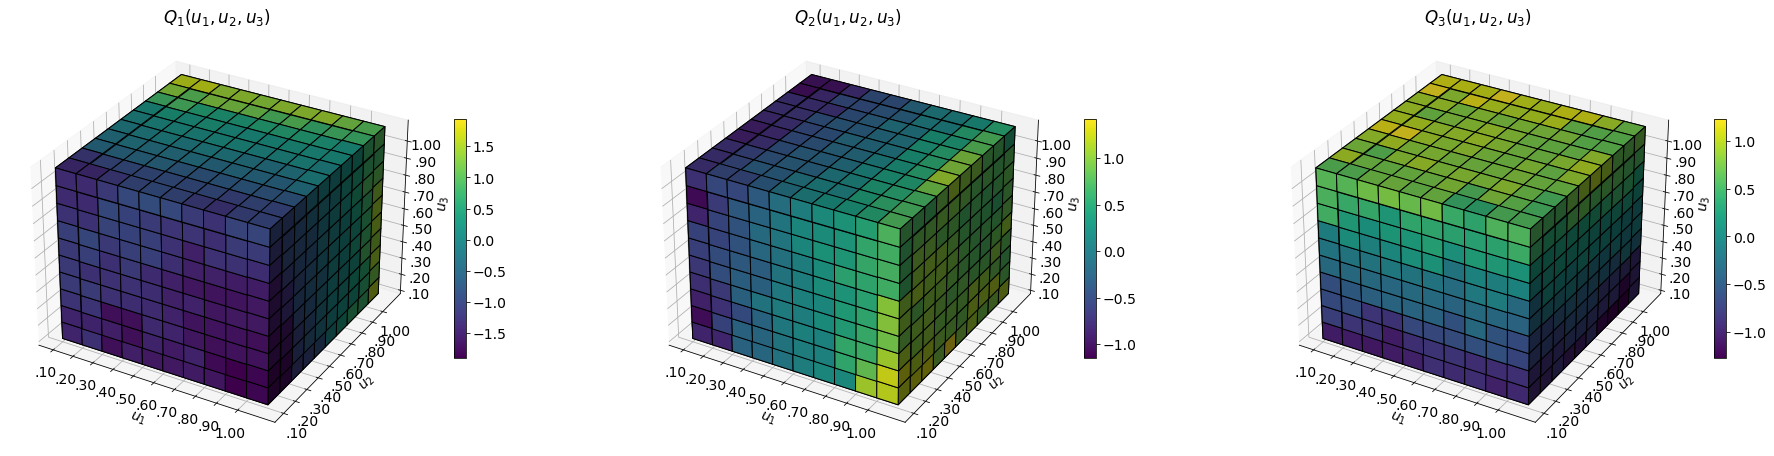

In [70]:
fig = plot_quantiles_3d(
    T,
    d,
    Qs=vq3.vector_quantiles(refine=True),
    Us=vq3.quantile_grid,
    figsize=(32, 22)
)
fig.savefig("figs/qr_3d.png", dpi=150, bbox_inches="tight")
